In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr



   Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0   1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1   1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2   1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3   1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4   1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   

   Biodro   Udo  Kolano  Kostka  Biceps  Przedramie  Nadgarstek  
0    94.5  59.0    37.3    21.9    32.0        27.4        17.1  
1    98.7  58.7    37.3    23.4    30.5        28.9        18.2  
2    99.2  59.6    38.9    24.0    28.8        25.2        16.6  
3   101.2  60.1    37.3    22.8    32.4        29.4        18.2  
4   101.9  63.2    42.2    24.0    32.2        27.7        17.7  
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:      

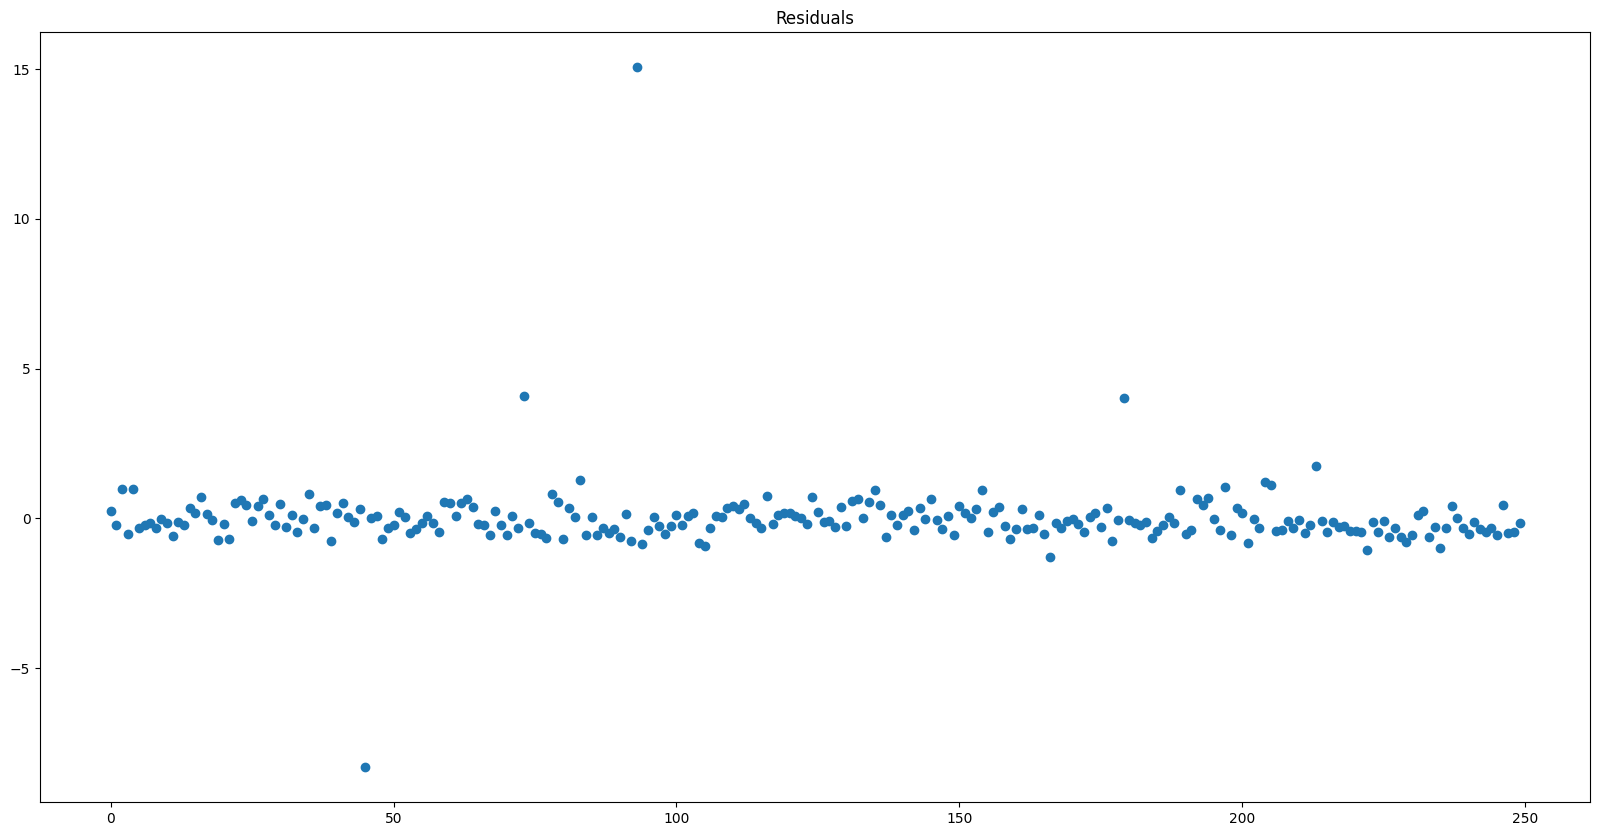

     Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0     1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1     1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2     1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3     1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4     1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   
..       ...     ...   ...     ...     ...    ...     ...     ...        ...   
245   1.0736    11.0    70  134.25   67.00   34.9    89.2    83.6  32.913386   
246   1.0236    33.6    72  201.00   69.75   40.9   108.5   105.0  41.338583   
247   1.0328    29.3    72  186.75   66.00   38.9   111.1   111.5  43.897638   
248   1.0399    26.0    72  190.75   70.50   38.9   108.3   101.3  39.881890   
249   1.0271    31.9    74  207.50   70.00   40.8   112.4   108.5  42.716535   

     Biodro   Udo  Kolano  Kostka  Bice

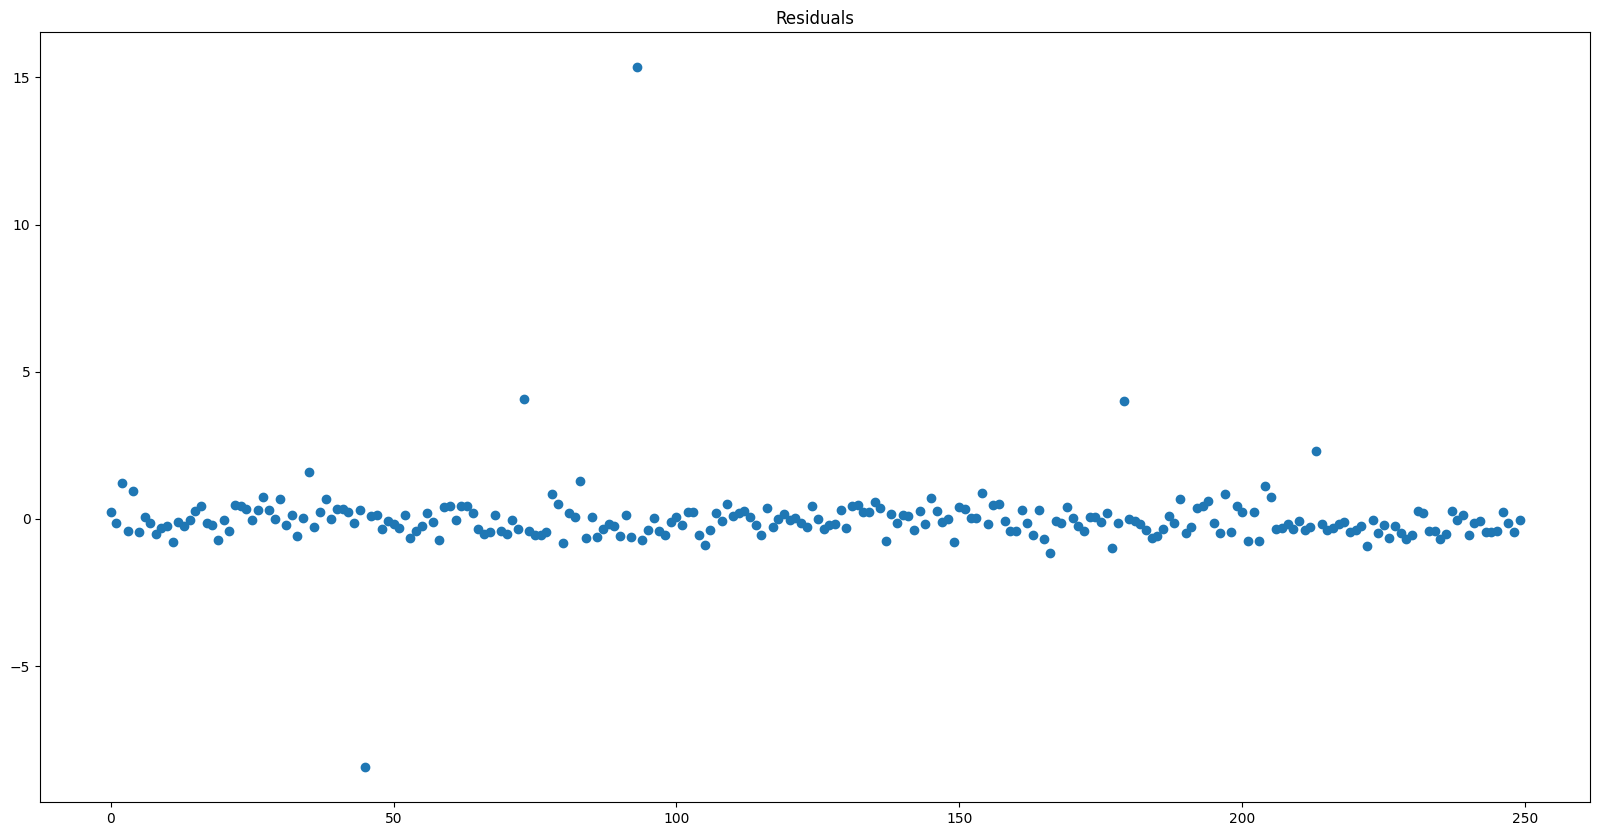

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2625.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          8.36e-200
Time:                        23:11:19   Log-Likelihood:                -410.48
No. Observations:                 250   AIC:                             831.0
Df Residuals:                     245   BIC:                             848.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.4878      6.562     69.561      0.0

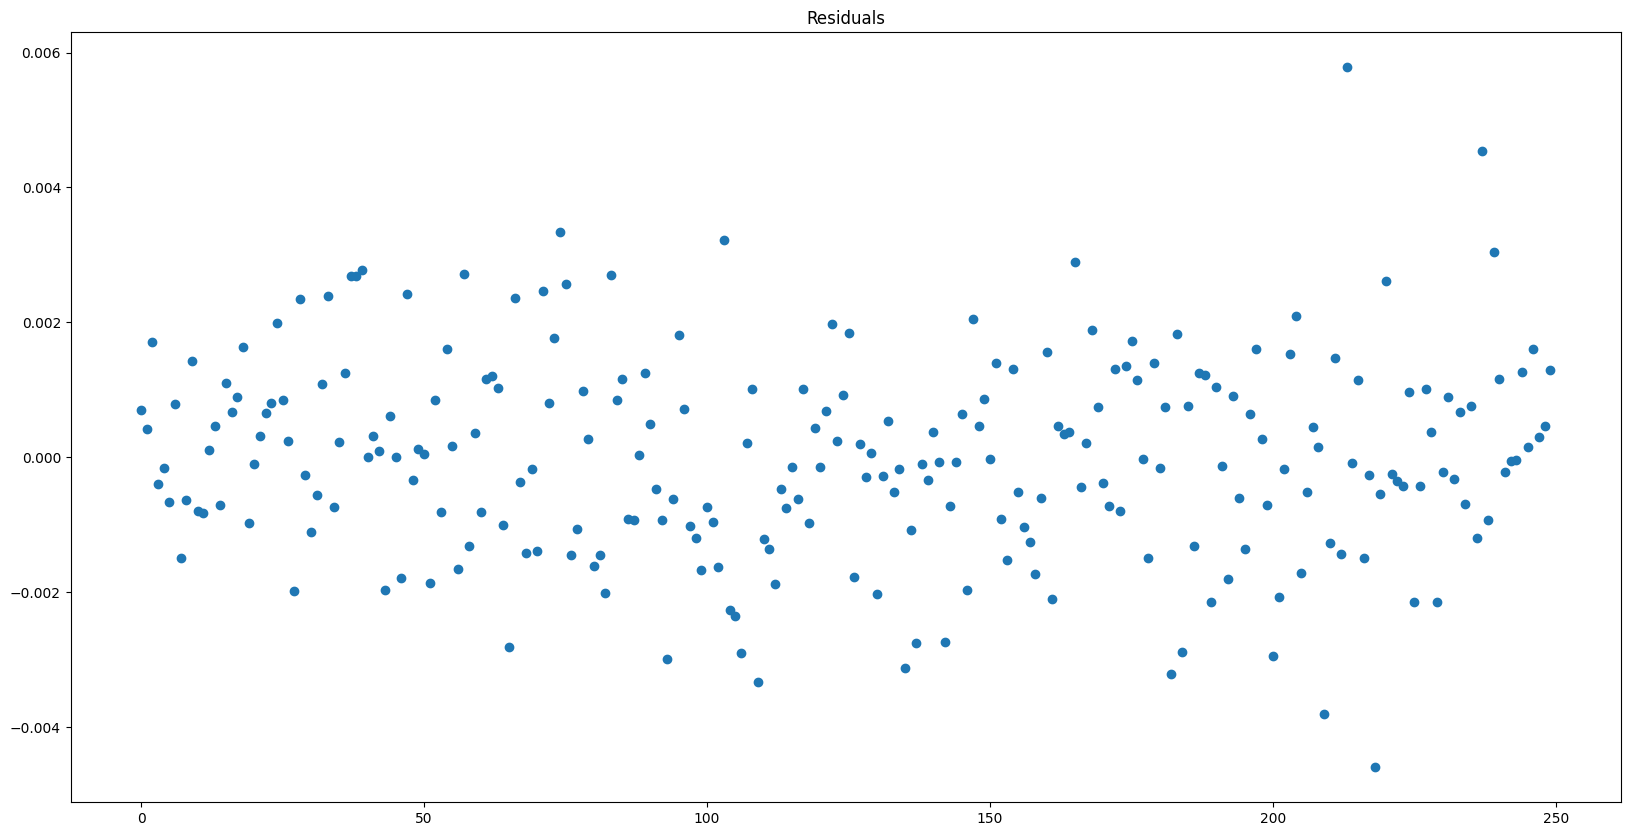

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     445.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.66e-120
Time:                        23:11:19   Log-Likelihood:                 1272.1
No. Observations:                 250   AIC:                            -2532.
Df Residuals:                     244   BIC:                            -2511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0141      0.002     -7.641      0.0

In [3]:
# Wczytaj dane
data_set_lab1_2 = pd.read_csv("Dane_lab1_2.csv", sep=";")

print(data_set_lab1_2.head())

# Konwersja do NumPy
data_array = np.array(data_set_lab1_2)

# Alternatywnie, jako DataFrame Pandas (lepsze do manipulacji i analizy)
data_frame = pd.DataFrame(data_set_lab1_2)
# model liniowy wielu zmiennych a1*x1 + a2*x2 + ... + aN*xN + b
# zmienna zależna to Pct.BF
X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

print(model.summary())
# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(data_frame)
#
# # usun zmienna najmniej istotna
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# #test grubbsa
# def test_grubbs(residuals):
#     mean_residual = np.mean(residuals)
#     std_residual = np.std(residuals)
#     max_residual = np.max(residuals)
#     n = len(residuals)
#     G = (max_residual - mean_residual) / std_residual
#     t = 0.95
#     critical_value = (n - 1) / np.sqrt(n) * np.sqrt(np.square(t) / (n - 2 + np.square(t)))
#     if G > critical_value:
#         return True
#     else:
#         return False

# usun linie 32 , 41, 85, 174,
# data_frame = data_frame.drop([30, 39, 83, 172, 73])
# data_frame = data_frame.reset_index(drop=True)
#
# print(data_frame[80:100])
# data_frame = data_frame.drop([89])
# data_frame = data_frame.reset_index(drop=True)


# reindex

# wyswielt dane  rekord 71

#print(data_frame)

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(model.summary())


bmi = data_frame['Waga'] / np.square(data_frame['Wzrost'])
# dodaj kolumne BMI
data_frame['BMI'] = bmi

# X=sm.add_constant(data_frame[['Wiek', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#Nadgarstek

# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#

# Kostka
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# # Wiek
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

#
# # Biodro
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

# brzuch
# X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())


# biceps
X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Przedramie']])
Y=data_frame['BMI']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     565.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          4.16e-145
Time:                        23:12:29   Log-Likelihood:                -323.84
No. Observations:                 200   AIC:                             679.7
Df Residuals:                     184   BIC:                             732.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.5709     13.004     34.340      0.0

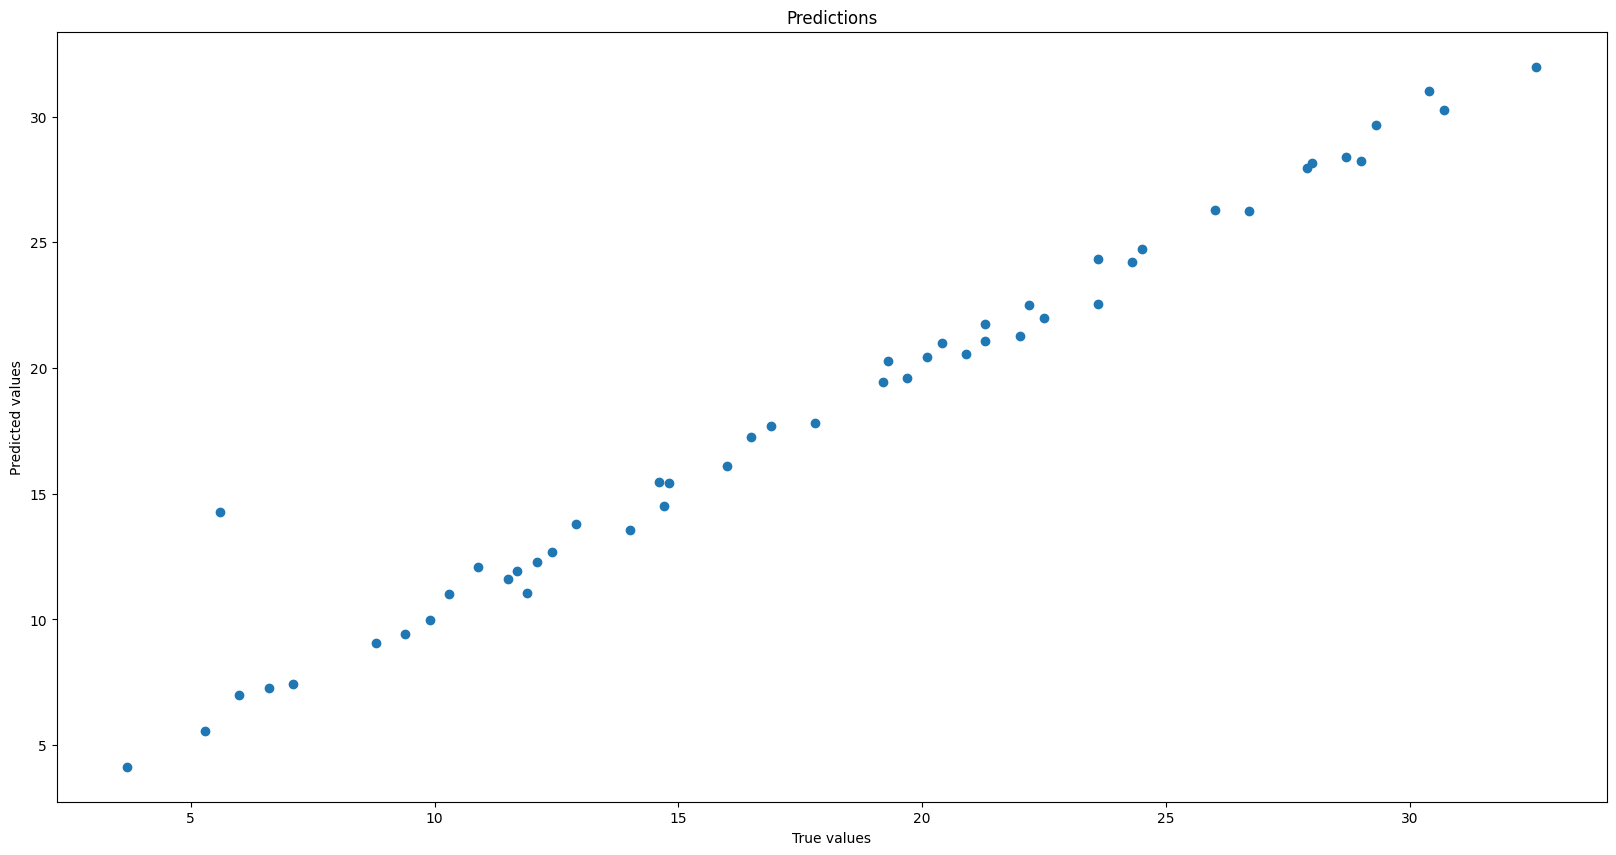

MAE:  1.337959760039895
RMSE:  1.337959760039895
ME:  -0.3330909917488522
MPE:  -0.04952144483241497
MAPE:  0.0630503576870739
Pearson correlation Gestosc: -0.987
Pearson correlation Wiek: 0.295
Pearson correlation Waga: 0.617
Pearson correlation Kostka: 0.245
    Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
73   1.0666    18.5    61  148.25    67.5   36.0    91.6    81.8  32.204724   

    Biodro   Udo  Kolano  Kostka  Biceps  Przedramie  Nadgarstek       BMI  
73    94.8  54.5    37.0    21.4    29.3        27.0        18.3  0.032538  
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     7887.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.86e-161
Time:                        23

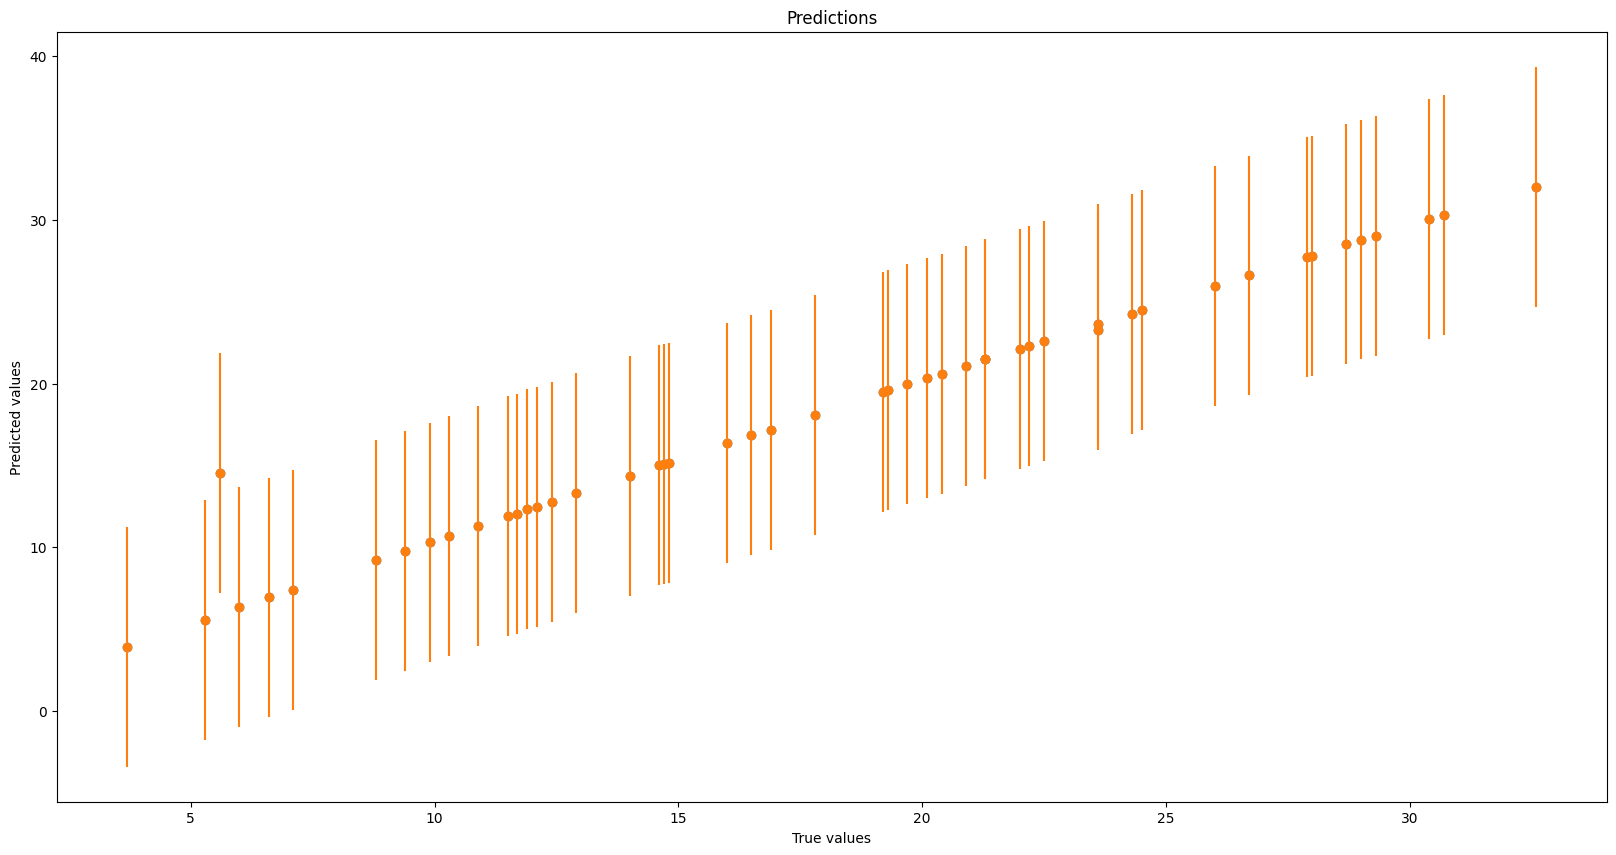

MAE:  1.2952698966051248
RMSE:  1.2952698966051248
ME:  -0.33666813872396617
MPE:  -0.04862623300722003
MAPE:  0.05261144156444075
Pearson correlation Gestosc: -0.987


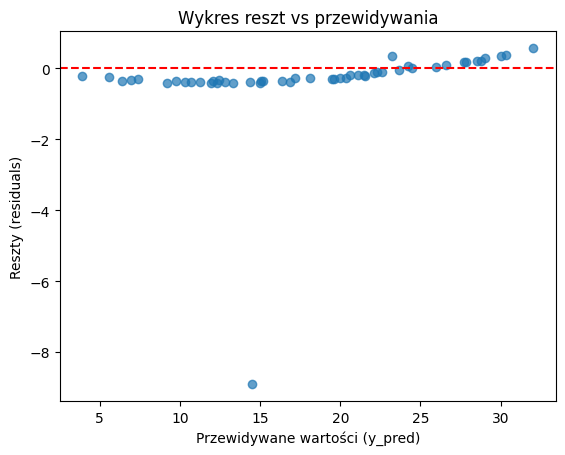

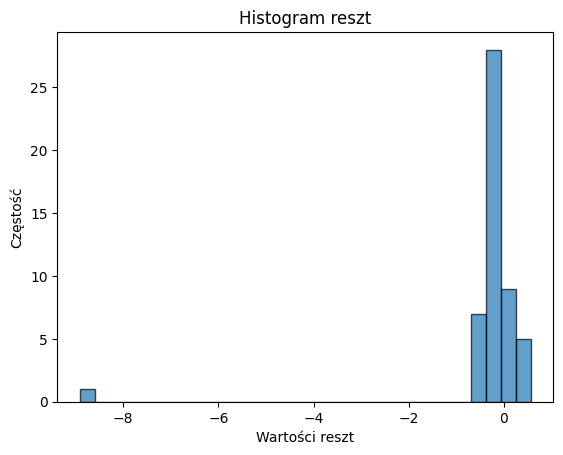

38
Gestosc         1.025800
Pct.BF         32.600000
Wiek           50.000000
Waga          203.000000
Wzrost         67.000000
Szyja          40.200000
Klatka        114.800000
Brzuch        108.100000
Talia          42.559055
Biodro        102.500000
Udo            61.300000
Kolano         41.100000
Kostka         24.700000
Biceps         34.100000
Przedramie     31.000000
Nadgarstek     18.300000
BMI             0.045222
Name: 38, dtype: float64


In [7]:
# podziel dane na zbiór uczący i testowy
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']], data_frame['Pct.BF'], test_size=0.2, random_state=42)
X_test=sm.add_constant(X_test)
X_train=sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()
print(model.summary())
#obliczanie predykcji
predictions = model.predict(X_test)

# porównanie predykcji z wartościami rzeczywistymi
plt.figure(figsize=(20, 10))
plt.plot(Y_test, predictions, 'o')
plt.title('Predictions')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# obliczanie błędu

def calculate_mae(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

print('MAE: ', calculate_mae(Y_test, predictions))
print('RMSE: ', calculate_rmse(Y_test, predictions))
print('ME: ', calculate_me(Y_test, predictions))
print('MPE: ', calculate_mpe(Y_test, predictions))
print('MAPE: ', calculate_mape(Y_test, predictions))

#współczynnik Pearsona R-persona

# corr, _ = pearsonr(, Y_test)
# print('Pearson correlation: %.3f' % corr)
#'Gestosc', 'Wiek', 'Waga' , 'Kostka'

corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Pct.BF'])
print('Pearson correlation Gestosc: %.3f' % corr)
corr, _ = pearsonr(data_frame['Wiek'], data_frame['Pct.BF'])
print('Pearson correlation Wiek: %.3f' % corr)
corr, _ = pearsonr(data_frame['Waga'], data_frame['Pct.BF'])
print('Pearson correlation Waga: %.3f' % corr)
corr, _ = pearsonr(data_frame['Kostka'], data_frame['Pct.BF'])
print('Pearson correlation Kostka: %.3f' % corr)


# w wyniku analizy
# Pearson correlation Gestosc: -0.987
# Pearson correlation Wiek: 0.293
# Pearson correlation Waga: 0.614
# Pearson correlation Kostka: 0.285
# gdzie przedział
# od 0.7 do 1 lub -0.7 do -1 oznacza silną korelację,
# od 0.3 do 0.7 lub -0.3 do -0.7 oznacza umiarkowaną korelację, a
# od 0 do 0.3 lub -0 do -0.3 oznacza słabą korelację
# wyciągamy wnioski, że zmienna Gestosc ma silną korelację z Pct.BF, a Wiek, Waga, Kostka mają słabą korelację z Pct.BF

# w wyniku analizy tworzymy model liniowy zmienna zależna Pct.BF, a niezależne Gestosc oraz stałą
# rekord 71

# test na korelacje zmiennych Gestosc i Talia


X_train_zkorelowane = X_train[['const', 'Gestosc']]
X_test_zkorelowane = X_test[['const', 'Gestosc']]

# wyswietl rekordy z bf =18.5
print(data_frame[data_frame['Pct.BF'] == 18.5])
model = sm.OLS(Y_train, X_train_zkorelowane).fit()
print(model.summary())
predictions = model.predict(X_test_zkorelowane)
plt.figure(figsize=(20, 10))
plt.plot(Y_test, predictions, 'o')
plt.title('Predictions')
plt.xlabel('True values')
plt.ylabel('Predicted values')
# dodać bar z błedem std
plt.errorbar(Y_test, predictions, yerr=np.std(predictions), fmt='o')
plt.show()
print('MAE: ', calculate_mae(Y_test, predictions))
print('RMSE: ', calculate_rmse(Y_test, predictions))
print('ME: ', calculate_me(Y_test, predictions))
print('MPE: ', calculate_mpe(Y_test, predictions))
print('MAPE: ', calculate_mape(Y_test, predictions))
corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Pct.BF'])
print('Pearson correlation Gestosc: %.3f' % corr)
#

residual= Y_test-predictions
plt.scatter(predictions, residual, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Przewidywane wartości (y_pred)")
plt.ylabel("Reszty (residuals)")
plt.title("Wykres reszt vs przewidywania")
plt.show()


plt.hist(residual, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Wartości reszt")
plt.ylabel("Częstość")
plt.title("Histogram reszt")
plt.show()
# wyswietl record z max reszta
print(residual.idxmax())
print(data_frame.iloc[residual.idxmax()])




Pearson correlation Wzrost: 0.043
Pearson correlation Klatka: -0.680
Pearson correlation Talia: -0.809
Pearson correlation Nadgarstek: -0.318
Pearson correlation Klatka: 0.644
                            OLS Regression Results                            
Dep. Variable:                Gestosc   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     396.2
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.87e-49
Time:                        00:00:37   Log-Likelihood:                 616.35
No. Observations:                 200   AIC:                            -1229.
Df Residuals:                     198   BIC:                            -1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

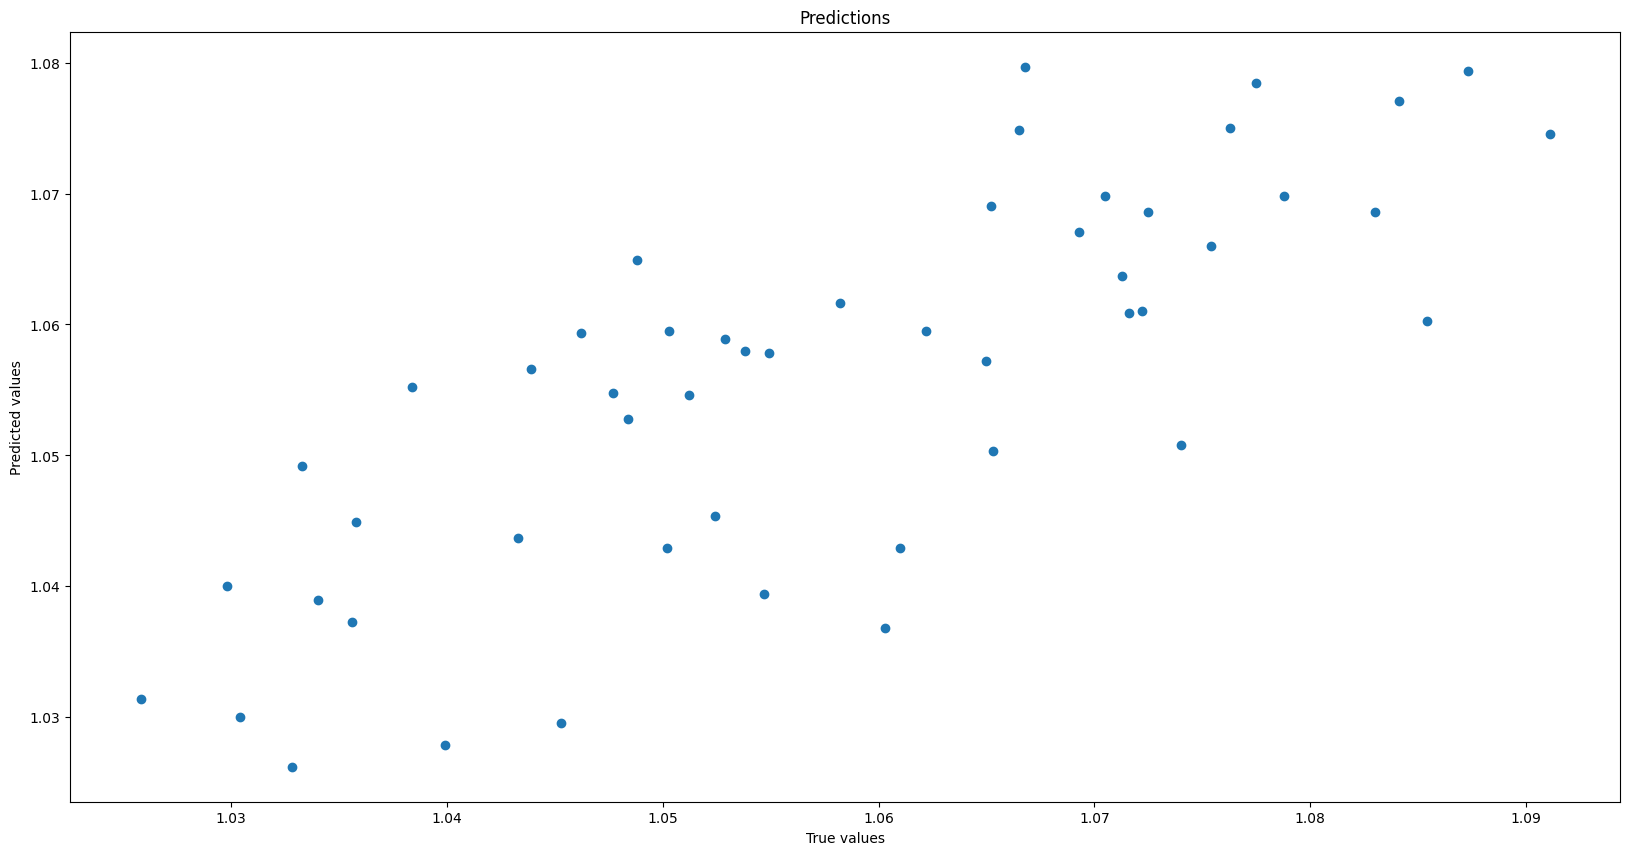

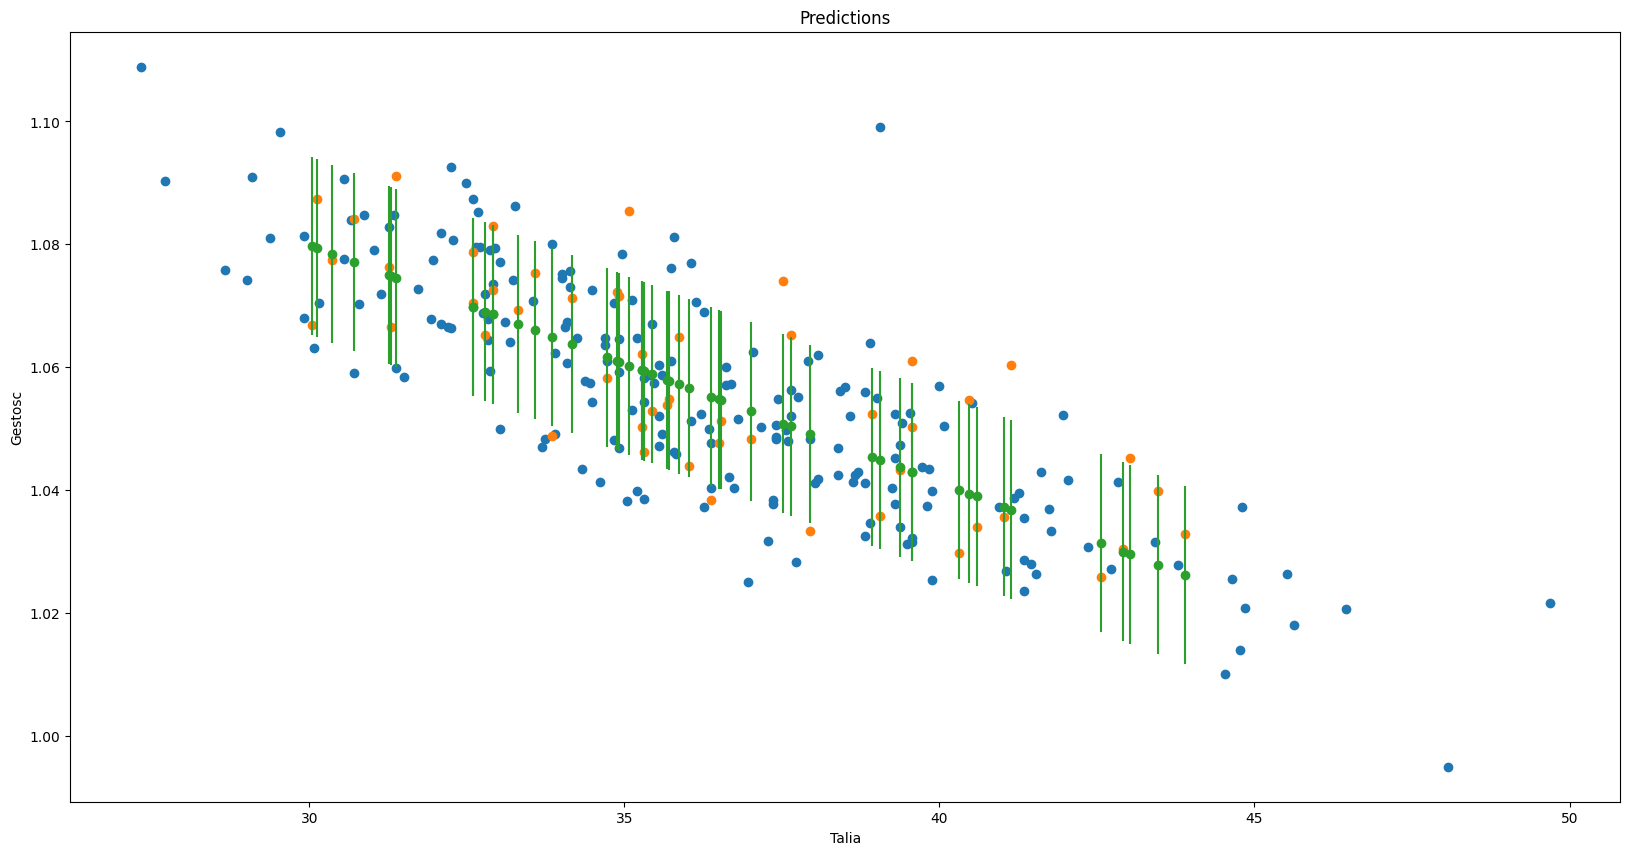

Pearson correlation Klatka: 0.644


In [54]:
# druga zależność gdzie zmienna zależna to Gestosc

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# usuwam Kolano

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo' ,'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# brzuch 0.758

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Talia', 'Biodro', 'Udo' ,'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Waga 0.593
#
# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost', 'Szyja', 'Klatka', 'Talia', 'Biodro', 'Udo' ,'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# kostka 0.236

#
# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost', 'Szyja', 'Klatka', 'Talia', 'Biodro', 'Udo' , 'Biceps', 'Przedramie', 'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Przedramie 0.196


# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost', 'Szyja', 'Klatka', 'Talia', 'Biodro', 'Udo' , 'Biceps',  'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Udo               0.151

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost', 'Szyja', 'Klatka', 'Talia', 'Biodro',  'Biceps',  'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Biodro  0.283


# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost', 'Szyja', 'Klatka', 'Talia',   'Biceps',  'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Szyja 0.133

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost','Klatka', 'Talia',   'Biceps',  'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Biceps 0.056

# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[['Wiek',  'Wzrost','Klatka', 'Talia',    'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())

# Wiek      0.102


# Y_Gestosc= data_frame['Gestosc']
#
# X_Gestosc= sm.add_constant(data_frame[[  'Wzrost','Klatka', 'Talia',    'Nadgarstek']])
#
# model_dla_gestosci = sm.OLS(Y_Gestosc, X_Gestosc).fit()
#
# print(model_dla_gestosci.summary())
#
# # coef

corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Wzrost'])
print('Pearson correlation Wzrost: %.3f' % corr)
corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Klatka'])
print('Pearson correlation Klatka: %.3f' % corr)
corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Talia'])
print('Pearson correlation Talia: %.3f' % corr)
corr, _ = pearsonr(data_frame['Gestosc'], data_frame['Nadgarstek'])
print('Pearson correlation Nadgarstek: %.3f' % corr)

# Pearson correlation Wzrost: 0.043
# Pearson correlation Klatka: -0.680
# Pearson correlation Talia: -0.809
# Pearson correlation Nadgarstek: -0.318

# tworzymy model liniowy zmienna zależna Gestosc, a niezależne Talia oraz stałą

# X_Gestosc_corr = X_test[['const', 'Talia']]
# Y_Gestosc_corr = data_frame['Gestosc']
#
# X_G, X_test_G, Y_G, Y_test_G = train_test_split(data_frame[['Talia']], data_frame['Gestosc'], test_size=0.2, random_state=42)
# X_test_G=sm.add_constant(X_test_G)
# X_G=sm.add_constant(X_G)
#
# model = sm.OLS(Y_G, X_G).fit()
# print(model.summary())
# predictions = model.predict(X_test_G)
#
# plt.figure(figsize=(20, 10))
# plt.plot(Y_test_G, predictions, 'o')
# plt.title('Predictions')
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# plt.show()

# X_Gestosc_corr = X_test[['const', 'Talia', 'Klatka']]
# Y_Gestosc_corr = data_frame['Gestosc']
#
# X_G, X_test_G, Y_G, Y_test_G = train_test_split(data_frame[['Talia', 'Klatka']], data_frame['Gestosc'], test_size=0.2, random_state=42)
# X_test_G=sm.add_constant(X_test_G)
# X_G=sm.add_constant(X_G)
#
# model = sm.OLS(Y_G, X_G).fit()
# print(model.summary())
# predictions = model.predict(X_test_G)
#
# plt.figure(figsize=(20, 10))
# plt.plot(Y_test_G, predictions, 'o')
# plt.title('Predictions')
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# plt.show()
#
#
# corr, _ = pearsonr(data_frame['Talia'], data_frame['Klatka'])
# print('Pearson correlation Klatka: %.3f' % corr)
#
# X_Gestosc_corr = X_test[['const', 'Talia', 'Klatka', 'Nadgarstek']]
# Y_Gestosc_corr = data_frame['Gestosc']
#
# X_G, X_test_G, Y_G, Y_test_G = train_test_split(data_frame[['Talia', 'Klatka', 'Nadgarstek']], data_frame['Gestosc'], test_size=0.2, random_state=42)
# X_test_G=sm.add_constant(X_test_G)
# X_G=sm.add_constant(X_G)
#
# model = sm.OLS(Y_G, X_G).fit()
# print(model.summary())
# predictions = model.predict(X_test_G)
#
# plt.figure(figsize=(20, 10))
# plt.plot(Y_test_G, predictions, 'o')
# plt.title('Predictions')
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# plt.show()

#
corr, _ = pearsonr(data_frame['Klatka'], data_frame['Nadgarstek'])
print('Pearson correlation Klatka: %.3f' % corr)
#
#
X_Gestosc_corr = X_test[['const', 'Wzrost', 'Nadgarstek']]
Y_Gestosc_corr = data_frame['Gestosc']

X_G, X_test_G, Y_G, Y_test_G = train_test_split(data_frame[['Talia']], data_frame['Gestosc'], test_size=0.2, random_state=42)
X_test_G=sm.add_constant(X_test_G)
X_G=sm.add_constant(X_G)

model = sm.OLS(Y_G, X_G).fit()
print(model.summary())
predictions = model.predict(X_test_G)

plt.figure(figsize=(20, 10))
plt.plot(Y_test_G, predictions, 'o')
plt.title('Predictions')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()


# wykres talia od gestosci oraz predykcjami
plt.figure(figsize=(20, 10))
plt.plot(X_G['Talia'], Y_G, 'o')
plt.plot(X_test_G['Talia'], Y_test_G, 'o')
plt.title('Predictions')
plt.xlabel('Talia')
plt.ylabel('Gestosc')
# errorbar dla predykcji
plt.errorbar(X_test_G['Talia'], predictions, yerr=np.std(predictions), fmt='o')
plt.show()

corr, _ = pearsonr(data_frame['Klatka'], data_frame['Nadgarstek'])
print('Pearson correlation Klatka: %.3f' % corr)





# X_Gestosc_corr = X_test[['const', 'Talia', 'Nadgarstek', 'Wzrost']]
# Y_Gestosc_corr = data_frame['Gestosc']
#
# X_G, X_test_G, Y_G, Y_test_G = train_test_split(data_frame[['Talia',  'Nadgarstek', 'Wzrost']], data_frame['Gestosc'], test_size=0.2, random_state=42)
# X_test_G=sm.add_constant(X_test_G)
# X_G=sm.add_constant(X_G)
#
# model = sm.OLS(Y_G, X_G).fit()
# print(model.summary())
# predictions = model.predict(X_test_G)
#
# plt.figure(figsize=(20, 10))
# plt.plot(Y_test_G, predictions, 'o')
# plt.title('Predictions')
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# # dodać bar z błedem std
# plt.show()
#
# corr, _ = pearsonr(data_frame['Talia'], data_frame['Wzrost'])
# print('Pearson correlation Talia: %.3f' % corr)
# corr, _ = pearsonr(data_frame['Nadgarstek'], data_frame['Wzrost'])
# print('Pearson correlation Nadgarstek: %.3f' % corr)
# corr, _ = pearsonr(data_frame['Klatka'], data_frame['Wzrost'])
# print('Pearson correlation Klatka: %.3f' % corr)



In [52]:
# cross validation sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Talia i Gestosc
X = data_frame[['Talia']]
Y = data_frame[['Gestosc']]
model = LinearRegression()
# 5-fold cross validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')
print(scores)

# wyswietl wyniki cross validation



[-1.21140468e-04 -1.73524868e-04 -1.06119899e-04 -1.29438281e-04
 -9.47285676e-05]
